In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Importing the dataset (Hidden Input)
df = pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/weight-height.csv')
df.head()

,Height,Weight
0,68.033808,212.910225
1,72.870360,211.342497
2,72.800844,206.828189
3,72.418317,196.028506
4,72.205974,228.761781


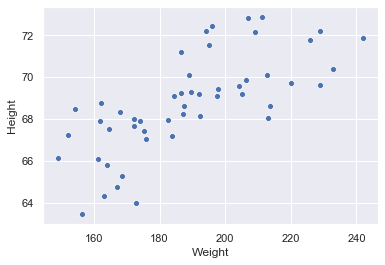

In [14]:
df = df[:50]
sns.scatterplot(data=df, x="Weight", y="Height")

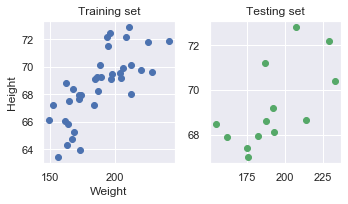

In [15]:
X = pd.DataFrame(df['Weight'])
y = df['Height']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(X_train, y_train, 'o', c='b')
axes[1].plot(X_test, y_test, 'o', c='g')

axes[0].title.set_text('Training set')
axes[1].title.set_text('Testing set')

axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Height')
fig.tight_layout()

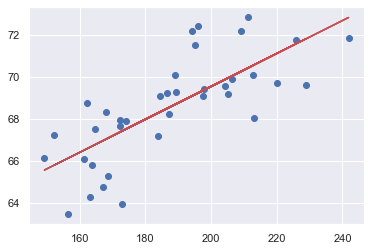

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_train_linreg_pred = linreg.predict(X_train)

plt.plot(X_train, y_train, 'o', c='b')
plt.plot(X_train, y_train_linreg_pred, '-', c='r')

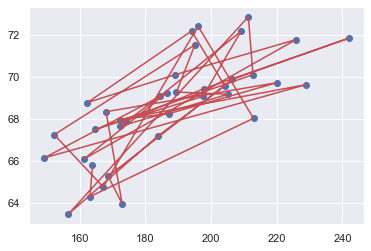

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_train_dt_pred = dt.predict(X_train)

plt.plot(X_train, y_train, 'o', c='b')
plt.plot(X_train, y_train_dt_pred, '-', c='r')

In [18]:
from sklearn.metrics import mean_squared_error

def get_bias(y, y_pred):
    return np.round(np.mean((y_pred - y) ** 2), 2)

In [19]:
linreg_train_bias = get_bias(y_train, y_train_linreg_pred)
print('Linear Regression Training Bias = %0.2f' % linreg_train_bias)

dt_train_bias = get_bias(y_train, y_train_dt_pred)
print('DecisionTree Regressor Training Bias = %0.2f' % dt_train_bias)

Linear Regression Training Bias = 2.67
DecisionTree Regressor Training Bias = 0.00


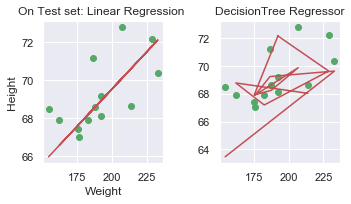

In [20]:
y_test_linreg_pred = linreg.predict(X_test)
y_test_dt_pred = dt.predict(X_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(X_test, y_test, 'o', c='g')
axes[0].plot(X_test, y_test_linreg_pred, '-', c='r')
axes[0].title.set_text('On Test set: Linear Regression ')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Height')

axes[1].plot(X_test, y_test, 'o', c='g')
axes[1].plot(X_test, y_test_dt_pred, '-', c='r')
axes[1].title.set_text('DecisionTree Regressor')

fig.tight_layout()

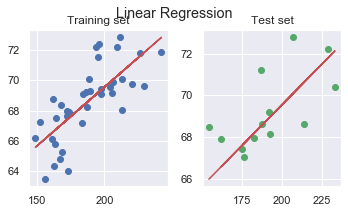

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
fig.suptitle('Linear Regression')
axes[0].set_title('Training set')
axes[0].plot(X_train, y_train, 'o', c='b')
axes[0].plot(X_train, y_train_linreg_pred, '-', c='r')

axes[1].set_title('Test set')
axes[1].plot(X_test, y_test, 'o', c='g')
axes[1].plot(X_test, y_test_linreg_pred, '-', c='r')

fig.tight_layout()

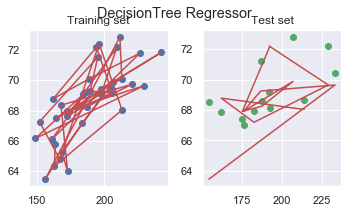

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
fig.suptitle('DecisionTree Regressor')
axes[0].set_title('Training set')
axes[0].plot(X_train, y_train, 'o', c='b')
axes[0].plot(X_train, y_train_dt_pred, '-', c='r')

axes[1].set_title('Test set')
axes[1].plot(X_test, y_test, 'o', c='g')
axes[1].plot(X_test, y_test_dt_pred, '-', c='r')

fig.tight_layout()

In [23]:
def sum_squares(y, y_pred):
    return (y_pred-y)**2

linreq_train_sum_sq = sum_squares(y_train, y_train_linreg_pred)
linreg_test_sum_sq = sum_squares(y_test, y_test_linreg_pred)
error = pd.concat([linreq_train_sum_sq, linreg_test_sum_sq], ignore_index=True)
linreg_variance = np.round(np.var(error), 2)


dt_train_sum_sq = sum_squares(y_train, y_train_dt_pred)
dt_test_sum_sq = sum_squares(y_test, y_test_dt_pred)
error = pd.concat([dt_train_sum_sq, dt_test_sum_sq], ignore_index=True)
dt_variance = np.round(np.var(error), 2)

print('Variance for Linear Regression: %0.2f' % linreg_variance)
print('Variance for DecisionTree Regressor: %0.2f' % dt_variance)

Variance for Linear Regression: 9.58
Variance for DecisionTree Regressor: 20.41


In [24]:
df.head()

,Height,Weight
0,68.033808,212.910225
1,72.870360,211.342497
2,72.800844,206.828189
3,72.418317,196.028506
4,72.205974,228.761781
